# Informazioni consegna
* Aggiungere i componenti del proprio gruppo in questo [form](https://forms.office.com/r/1WKBx4YgSH). 
* **I gruppi possono essere composti da massimo 3 persone. Nel caso si intenda fare il progetto da soli bisogna comunque aggiungere il proprio nome nel form.**
* Per la consegna è necessario caricare su Virtuale la relazione, il notebook Colab e le immagini generate.
* La consegna deve essere effettuata da un qualsiasi membro del gruppo e verrà automaticamente attribuita ai restanti componenti.
* Per i dettagli sulle tempistiche e le scadenze si faccia riferimento a Virtuale.

# Deblur Immagini
Il problema di deblur consiste nella ricostruzione di un immagine a partire da un dato acquisito mediante il seguente modello:

\begin{align*}
    b = A x + \eta
\end{align*}

dove $b$ rappresenta l'immagine corrotta, $x$ l'immagine originale che vogliamo ricostruire, $A$ l'operatore che applica il blur Gaussiano ed $\eta$ il rumore additivo con distribuzione Gaussiana di  media $\mathbb{0}$ e deviazione standard $\sigma$.

## Funzioni di blur
Le seguenti funzioni servono per applicare il blur di tipo gaussiano ad un'immagine.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, metrics
from scipy import signal
from numpy import fft
from PIL import Image
from scipy.optimize import minimize

# Create a Gaussian kernel of size kernlen and standard deviation sigma
def gaussian_kernel(kernlen, sigma):
    x = np.linspace(- (kernlen // 2), kernlen // 2, kernlen)    
    # Unidimensional Gaussian kernel
    kern1d = np.exp(- 0.5 * (x**2 / sigma))
    # Bidimensional Gaussian kernel
    kern2d = np.outer(kern1d, kern1d)
    # Normalization
    return kern2d / kern2d.sum()

# Compute the FFT of the kernel 'K' of size 'd' padding with the zeros necessary
# to match the size of 'shape'
def psf_fft(K, d, shape):
    # Zero padding
    K_p = np.zeros(shape)
    K_p[:d, :d] = K

    # Shift
    p = d // 2
    K_pr = np.roll(np.roll(K_p, -p, 0), -p, 1)

    # Compute FFT
    K_otf = fft.fft2(K_pr)
    return K_otf

# Multiplication by A
def A(x, K):
  #print(x.shape, K.shape)
  x = fft.fft2(x)
  return np.real(fft.ifft2(K * x))

# Multiplication by A transpose
def AT(x, K):
  x = fft.fft2(x)
  return np.real(fft.ifft2(np.conj(K) * x))

## Generazione dataset
Generare un set di 8 immagini 512$\times$512 in formato ${\tt png}$ in scala dei grigi che contengano tra i 2 ed i 6 oggetti geometrici, di colore uniforme, su sfondo nero. 


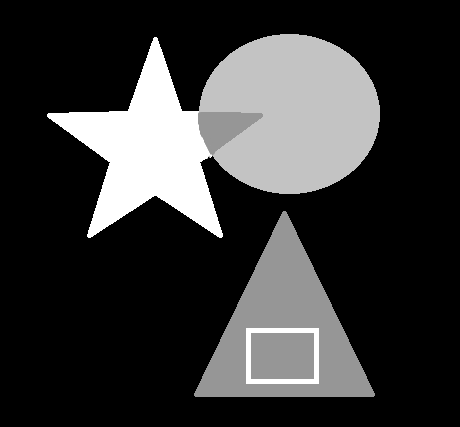


## 1) Generazione immagini corrotte
Degradare le immagini applicando, mediante le funzioni riportate nella cella precedente,  l'operatore di blur con parametri

+ $\sigma=0.5$ dimensione $5\times 5$
+ $\sigma=1$ dimensione $7\times 7$
+ $\sigma=1.3$ dimensione $9\times 9$

ed aggiungendo rumore gaussiano con deviazione standard $(0,0.05]$

In [3]:
size = [5,7,9]
sigma = [0.5,1,1.3]
deviation = [0.01,0.025,0.05]


In [12]:
#filtri di blur
K0 = psf_fft(gaussian_kernel(size[0],sigma[0]),size[0],(512,512))
K1 = psf_fft(gaussian_kernel(size[1],sigma[1]),size[1],(512,512))
K2 = psf_fft(gaussian_kernel(size[2],sigma[2]),size[2],(512,512))

In [13]:
#degradazione delle 8 immagini con aggiunta di rumore con deviazione standard di 0.05 
A0 = np.asarray(Image.open("Immagini_progetto/img_0.png"))/255.0
A1 = np.asarray(Image.open("Immagini_progetto/img_1.png"))/255.0
A2 = np.asarray(Image.open("Immagini_progetto/img_2.png"))/255.0
A3 = np.asarray(Image.open("Immagini_progetto/img_3.png"))/255.0
A4 = np.asarray(Image.open("Immagini_progetto/img_4.png"))/255.0
A5 = np.asarray(Image.open("Immagini_progetto/img_5.png"))/255.0
A6 = np.asarray(Image.open("Immagini_progetto/img_6.png"))/255.0
A7 = np.asarray(Image.open("Immagini_progetto/img_7.png"))/255.0

A0_blur0 = A(A0, K0) + np.random.normal(size=A0.shape)*deviation[2]
A0_blur1 = A(A0, K1) + np.random.normal(size=A0.shape)*deviation[2]
A0_blur2 = A(A0, K2) + np.random.normal(size=A0.shape)*deviation[2]
A1_blur0 = A(A1, K0) + np.random.normal(size=A1.shape)*deviation[2]
A1_blur1 = A(A1, K1) + np.random.normal(size=A1.shape)*deviation[2]
A1_blur2 = A(A1, K2) + np.random.normal(size=A1.shape)*deviation[2]
A2_blur0 = A(A2, K0) + np.random.normal(size=A2.shape)*deviation[2]
A2_blur1 = A(A2, K1) + np.random.normal(size=A2.shape)*deviation[2]
A2_blur2 = A(A2, K2) + np.random.normal(size=A2.shape)*deviation[2]
A3_blur0 = A(A3, K0) + np.random.normal(size=A3.shape)*deviation[2]
A3_blur1 = A(A3, K1) + np.random.normal(size=A3.shape)*deviation[2]
A3_blur2 = A(A3, K2) + np.random.normal(size=A3.shape)*deviation[2]
A4_blur0 = A(A4, K0) + np.random.normal(size=A4.shape)*deviation[2]
A4_blur1 = A(A4, K1) + np.random.normal(size=A4.shape)*deviation[2]
A4_blur2 = A(A4, K2) + np.random.normal(size=A4.shape)*deviation[2]
A5_blur0 = A(A5, K0) + np.random.normal(size=A5.shape)*deviation[2]
A5_blur1 = A(A5, K1) + np.random.normal(size=A5.shape)*deviation[2]
A5_blur2 = A(A5, K2) + np.random.normal(size=A5.shape)*deviation[2]
A6_blur0 = A(A6, K0) + np.random.normal(size=A6.shape)*deviation[2]
A6_blur1 = A(A6, K1) + np.random.normal(size=A6.shape)*deviation[2]
A6_blur2 = A(A6, K2) + np.random.normal(size=A6.shape)*deviation[2]
A7_blur0 = A(A7, K0) + np.random.normal(size=A7.shape)*deviation[2]
A7_blur1 = A(A7, K1) + np.random.normal(size=A7.shape)*deviation[2]
A7_blur2 = A(A7, K2) + np.random.normal(size=A7.shape)*deviation[2]

## 2) Soluzione naive

Una possibile ricostruzione dell'immagine originale $x$ partendo dall'immagine corrotta $b$ è la soluzione naive data dal minimo del seguente problema di ottimizzazione:
\begin{align}
  x^* = \arg\min_x \frac{1}{2} ||Ax - b||_2^2
\end{align}

La funzione $f$ da minimizzare è data dalla formula
  $f(x) = \frac{1}{2} ||Ax - b||_2^2 $, il cui gradiente $\nabla f$ è dato da
$\nabla f(x) = A^TAx - A^Tb  $.

Utilizzando il metodo del gradiente coniugato implementato dalla funzione `minimize` calcolare la soluzione naive. 

In [8]:
#help(minimize)

In [14]:
%%time

def f_naive(x, K, b):
    x = np.reshape(x, (512,512))
    f = 0.5 * ( np.linalg.norm(A(x,K) - b, 2 ))**2
    df = AT(A(x,K),K) - (AT(b,K)) 
    #print('.',end='')    #per stampare puntini ad ogni esecuzione
    return (f,df.flatten())  #se jac=True ==> tupla e prende df da solo

x0 = np.zeros((512,512)).flatten()

CPU times: user 4.78 ms, sys: 1.47 ms, total: 6.25 ms
Wall time: 3.53 ms


In [ ]:
#ricostruzioni naive con minimize CG
deblurred_naive0_0 = minimize(f_naive, x0, method="CG", jac=True, args=(K0, A0_blur0,)).x
deblurred_naive0_1 = minimize(f_naive, x0, method="CG", jac=True, args=(K1, A0_blur1,)).x
deblurred_naive0_2 = minimize(f_naive, x0, method="CG", jac=True, args=(K2, A0_blur2,)).x
deblurred_naive1_0 = minimize(f_naive, x0, method="CG", jac=True, args=(K0, A1_blur0,)).x
deblurred_naive1_1 = minimize(f_naive, x0, method="CG", jac=True, args=(K1, A1_blur1,)).x
deblurred_naive1_2 = minimize(f_naive, x0, method="CG", jac=True, args=(K2, A1_blur2,)).x
deblurred_naive2_0 = minimize(f_naive, x0, method="CG", jac=True, args=(K0, A2_blur0,)).x
deblurred_naive2_1 = minimize(f_naive, x0, method="CG", jac=True, args=(K1, A2_blur1,)).x
deblurred_naive2_2 = minimize(f_naive, x0, method="CG", jac=True, args=(K2, A2_blur2,)).x
deblurred_naive3_0 = minimize(f_naive, x0, method="CG", jac=True, args=(K0, A3_blur0,)).x
deblurred_naive3_1 = minimize(f_naive, x0, method="CG", jac=True, args=(K1, A3_blur1,)).x
deblurred_naive3_2 = minimize(f_naive, x0, method="CG", jac=True, args=(K2, A3_blur2,)).x
deblurred_naive4_0 = minimize(f_naive, x0, method="CG", jac=True, args=(K0, A4_blur0,)).x
deblurred_naive4_1 = minimize(f_naive, x0, method="CG", jac=True, args=(K1, A4_blur1,)).x
deblurred_naive4_2 = minimize(f_naive, x0, method="CG", jac=True, args=(K2, A4_blur2,)).x
deblurred_naive5_0 = minimize(f_naive, x0, method="CG", jac=True, args=(K0, A5_blur0,)).x
deblurred_naive5_1 = minimize(f_naive, x0, method="CG", jac=True, args=(K1, A5_blur1,)).x
deblurred_naive5_2 = minimize(f_naive, x0, method="CG", jac=True, args=(K2, A5_blur2,)).x
deblurred_naive6_0 = minimize(f_naive, x0, method="CG", jac=True, args=(K0, A6_blur0,)).x
deblurred_naive6_1 = minimize(f_naive, x0, method="CG", jac=True, args=(K1, A6_blur1,)).x
deblurred_naive6_2 = minimize(f_naive, x0, method="CG", jac=True, args=(K2, A6_blur2,)).x
deblurred_naive7_0 = minimize(f_naive, x0, method="CG", jac=True, args=(K0, A7_blur0,)).x
deblurred_naive7_1 = minimize(f_naive, x0, method="CG", jac=True, args=(K1, A7_blur1,)).x
deblurred_naive7_2 = minimize(f_naive, x0, method="CG", jac=True, args=(K2, A7_blur2,)).x

## 3) Regolarizzazione
Per ridurre gli effetti del rumore nella ricostruzione è necessario introdurre un termine di regolarizzazione di Tikhonov. Si considera quindi il seguente problema di ottimizzazione.
\begin{align*}
  x^* = \arg\min_x \frac{1}{2} ||Ax - b||_2^2 + \frac{\lambda}{2} ||x||_2^2
\end{align*}

La funzione $f$ da minimizzare diventa
$f(x) = \frac{1}{2} ||Ax - b||_2^2 + \frac{\lambda}{2} ||x||_2^2$
il cui gradiente $\nabla f$ è dato da
$\nabla f(x) = A^TAx - A^Tb + λx$.

Utilizzando il metodo del gradiente coniugato implementato dalla funzione `minimize` ed il metodo del gradiente implementato a lezione, calcolare la soluzione del precendente problema di minimo regolarizzato per differenti valori di $\lambda$. 

In [18]:
LAMBDA_TIKHONOV = [1e-3,1e-2,1e-1] #costante lambda di regolarizazione

def f_tikhonov(x,K,b,LMBD):  # funzione per minimize di scipy, passa anche il gradiente
    x = np.reshape(x, (512,512))
    f = 0.5*(np.linalg.norm(A(x,K)-b,2)**2 + LMBD*np.linalg.norm(x,2)**2)
    df = AT(A(x,K), K) - AT(b,K) + LMBD*x
    return (f,df.flatten())

In [ ]:
#parametro di regolarizzazione I
deblurred_tikhonov_cg0_0_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A0_blur0,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg0_1_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A0_blur1,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg0_2_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A0_blur2,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg1_0_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A1_blur0,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg1_1_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A1_blur1,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg1_2_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A1_blur2,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg2_0_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A2_blur0,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg2_1_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A2_blur1,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg2_2_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A2_blur2,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg3_0_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A3_blur0,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg3_1_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A3_blur1,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg3_2_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A3_blur2,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg4_0_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A4_blur0,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg4_1_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A4_blur1,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg4_2_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A4_blur2,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg5_0_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A5_blur0,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg5_1_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A5_blur1,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg5_2_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A5_blur2,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg6_0_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A6_blur0,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg6_1_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A6_blur1,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg6_2_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A6_blur2,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg7_0_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A7_blur0,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg7_1_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A7_blur1,LAMBDA_TIKHONOV[0])).x
deblurred_tikhonov_cg7_2_0 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A7_blur2,LAMBDA_TIKHONOV[0])).x

In [ ]:
#parametro di regolarizzazione II
deblurred_tikhonov_cg0_0_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A0_blur0,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg0_1_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A0_blur1,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg0_2_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A0_blur2,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg1_0_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A1_blur0,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg1_1_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A1_blur1,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg1_2_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A1_blur2,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg2_0_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A2_blur0,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg2_1_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A2_blur1,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg2_2_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A2_blur2,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg3_0_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A3_blur0,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg3_1_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A3_blur1,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg3_2_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A3_blur2,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg4_0_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A4_blur0,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg4_1_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A4_blur1,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg4_2_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A4_blur2,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg5_0_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A5_blur0,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg5_1_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A5_blur1,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg5_2_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A5_blur2,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg6_0_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A6_blur0,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg6_1_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A6_blur1,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg6_2_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A6_blur2,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg7_0_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A7_blur0,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg7_1_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A7_blur1,LAMBDA_TIKHONOV[1])).x
deblurred_tikhonov_cg7_2_1 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A7_blur2,LAMBDA_TIKHONOV[1])).x

In [ ]:
#parametro di regolarizzazione III
deblurred_tikhonov_cg0_0_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A0_blur0,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg0_1_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A0_blur1,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg0_2_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A0_blur2,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg1_0_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A1_blur0,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg1_1_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A1_blur1,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg1_2_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A1_blur2,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg2_0_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A2_blur0,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg2_1_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A2_blur1,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg2_2_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A2_blur2,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg3_0_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A3_blur0,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg3_1_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A3_blur1,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg3_2_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A3_blur2,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg4_0_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A4_blur0,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg4_1_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A4_blur1,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg4_2_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A4_blur2,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg5_0_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A5_blur0,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg5_1_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A5_blur1,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg5_2_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A5_blur2,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg6_0_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A6_blur0,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg6_1_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A6_blur1,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg6_2_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A6_blur2,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg7_0_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K0, A7_blur0,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg7_1_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K1, A7_blur1,LAMBDA_TIKHONOV[2])).x
deblurred_tikhonov_cg7_2_2 = minimize(f_tikhonov, x0, method="CG", jac=True, args=(K2, A7_blur2,LAMBDA_TIKHONOV[2])).x

In [15]:
def f_tikhonov_gradiente(x,K,b,lmbd):  #funzione per GD
    x = np.reshape(x, (512,512))
    f = 0.5*(np.linalg.norm(A(x,K)-b,2)**2 + lmbd*np.linalg.norm(x,2)**2)
    return f

def grad_f_tikhonov(x,K,b,lmbd):    #gradiente per GD
    x = np.reshape(x, (512,512))
    df = AT(A(x,K), K) - AT(b,K) + lmbd*x
    return df.flatten()


In [16]:
def next_step(x,grad,f,K,b,lmbd): # backtracking procedure for the choice of the steplength
  alpha=1.1
  rho = 0.5
  c1 = 0.25
  p=-grad
  j=0
  jmax=100
  while ((f(x+alpha*p,K,b,lmbd) > f(x,K,b,lmbd)+c1*alpha*(grad.T@p)) and j<jmax ):
    alpha= rho*alpha
    j+=1
  if (j>jmax):
    return -1
  else:
    #print('alpha=',alpha)
    return alpha

In [17]:
def metodo_gradiente(x0,xTrue,f,grad_f,K,b,lmbd,step,MAXITERATION,ABSOLUTE_STOP): # funzione che implementa il metodo del gradiente
  #declare x_k and gradient_k vectors
  norm_grad_list=np.zeros((1,MAXITERATION+1))
  function_eval_list=np.zeros((1,MAXITERATION+1))
  error_list=np.zeros((1,MAXITERATION+1))
  
  #initialize first values
  x_last = x0 
  
  k=0

  function_eval_list[:,k]=f(x0,K,b,lmbd)#x_last[0], x_last[1])
  error_list[:,k]=np.linalg.norm(x_last-xTrue)
  norm_grad_list[:,k]=np.linalg.norm(grad_f(x_last,K,b,lmbd))

  while (np.linalg.norm(grad_f(x_last,K,b,lmbd),2)>ABSOLUTE_STOP and k < MAXITERATION ):
    #print(f(x_last))
    k=k+1
    grad = np.transpose(grad_f(x_last,K,b,lmbd)) # TODO direction is given by gradient of the last iteration

    # backtracking step
    step = next_step(x_last,grad,f,K,b,lmbd) # TODO
    # Fixed step
    #step = 0.1
    
    if(step==-1):
      print('non convergente')
      return (iteration) # no convergence

    x_last= x_last - step*grad # TODO gradient update

    function_eval_list[:,k]=f(x_last,K,b,lmbd)
    error_list[:,k]=np.linalg.norm(x_last-xTrue)
    norm_grad_list[:,k]=np.linalg.norm(grad_f(x_last,K,b,lmbd))

  function_eval_list = function_eval_list[:,:k+1]
  error_list = error_list[:,:k+1]
  norm_grad_list = norm_grad_list[:,:k+1]
  
  print('iterations=',k)
  return (x_last,norm_grad_list, function_eval_list, error_list, k)

In [18]:
%%time
step=0.1
MAXITERATIONS=30
ABSOLUTE_STOP=1e-3

x0 = np.ones((512,512)).flatten()

CPU times: user 4.51 ms, sys: 0 ns, total: 4.51 ms
Wall time: 2.77 ms


In [ ]:
#GD Tik lambda I
(x_last0_0_0,norm_grad_list0_0_0, function_eval_list0_0_0, error_list0_0_0, k0_0_0) = metodo_gradiente(x0,A0.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A0_blur0,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_1_0,norm_grad_list0_1_0, function_eval_list0_1_0, error_list0_1_0, k0_1_0) = metodo_gradiente(x0,A0.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A0_blur1,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_2_0,norm_grad_list0_2_0, function_eval_list0_2_0, error_list0_2_0, k0_2_0) = metodo_gradiente(x0,A0.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A0_blur2,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_0_0,norm_grad_list1_0_0, function_eval_list1_0_0, error_list1_0_0, k1_0_0) = metodo_gradiente(x0,A1.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A1_blur0,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_1_0,norm_grad_list1_1_0, function_eval_list1_1_0, error_list1_1_0, k1_1_0) = metodo_gradiente(x0,A1.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A1_blur1,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_2_0,norm_grad_list1_2_0, function_eval_list1_2_0, error_list1_2_0, k1_2_0) = metodo_gradiente(x0,A1.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A1_blur2,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_0_0,norm_grad_list2_0_0, function_eval_list2_0_0, error_list2_0_0, k2_0_0) = metodo_gradiente(x0,A2.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A2_blur0,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_1_0,norm_grad_list2_1_0, function_eval_list2_1_0, error_list2_1_0, k2_1_0) = metodo_gradiente(x0,A2.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A2_blur1,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_2_0,norm_grad_list2_2_0, function_eval_list2_2_0, error_list2_2_0, k2_2_0) = metodo_gradiente(x0,A2.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A2_blur2,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_0_0,norm_grad_list3_0_0, function_eval_list3_0_0, error_list3_0_0, k3_0_0) = metodo_gradiente(x0,A3.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A3_blur0,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_1_0,norm_grad_list3_1_0, function_eval_list3_1_0, error_list3_1_0, k3_1_0) = metodo_gradiente(x0,A3.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A3_blur1,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_2_0,norm_grad_list3_2_0, function_eval_list3_2_0, error_list3_2_0, k3_2_0) = metodo_gradiente(x0,A3.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A3_blur2,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_0_0,norm_grad_list4_0_0, function_eval_list4_0_0, error_list4_0_0, k4_0_0) = metodo_gradiente(x0,A4.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A4_blur0,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_1_0,norm_grad_list4_1_0, function_eval_list4_1_0, error_list4_1_0, k4_1_0) = metodo_gradiente(x0,A4.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A4_blur1,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_2_0,norm_grad_list4_2_0, function_eval_list4_2_0, error_list4_2_0, k4_2_0) = metodo_gradiente(x0,A4.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A4_blur2,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_0_0,norm_grad_list5_0_0, function_eval_list5_0_0, error_list5_0_0, k5_0_0) = metodo_gradiente(x0,A5.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A5_blur0,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_1_0,norm_grad_list5_1_0, function_eval_list5_1_0, error_list5_1_0, k5_1_0) = metodo_gradiente(x0,A5.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A5_blur1,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_2_0,norm_grad_list5_2_0, function_eval_list5_2_0, error_list5_2_0, k5_2_0) = metodo_gradiente(x0,A5.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A5_blur2,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_0_0,norm_grad_list6_0_0, function_eval_list6_0_0, error_list6_0_0, k6_0_0) = metodo_gradiente(x0,A6.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A6_blur0,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_1_0,norm_grad_list6_1_0, function_eval_list6_1_0, error_list6_1_0, k6_1_0) = metodo_gradiente(x0,A6.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A6_blur1,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_2_0,norm_grad_list6_2_0, function_eval_list6_2_0, error_list6_2_0, k6_2_0) = metodo_gradiente(x0,A6.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A6_blur2,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_0_0,norm_grad_list7_0_0, function_eval_list7_0_0, error_list7_0_0, k7_0_0) = metodo_gradiente(x0,A7.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A7_blur0,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_1_0,norm_grad_list7_1_0, function_eval_list7_1_0, error_list7_1_0, k7_1_0) = metodo_gradiente(x0,A7.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A7_blur1,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_2_0,norm_grad_list7_2_0, function_eval_list7_2_0, error_list7_2_0, k7_2_0) = metodo_gradiente(x0,A7.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A7_blur2,LAMBDA_TIKHONOV[0],step,MAXITERATIONS,ABSOLUTE_STOP)

In [ ]:
#GD Tik lambda II
(x_last0_0_1,norm_grad_list0_0_1, function_eval_list0_0_1, error_list0_0_1, k0_0_1) = metodo_gradiente(x0,A0.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A0_blur0,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_1_1,norm_grad_list0_1_1, function_eval_list0_1_1, error_list0_1_1, k0_1_1) = metodo_gradiente(x0,A0.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A0_blur1,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_2_1,norm_grad_list0_2_1, function_eval_list0_2_1, error_list0_2_1, k0_2_1) = metodo_gradiente(x0,A0.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A0_blur2,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_0_1,norm_grad_list1_0_1, function_eval_list1_0_1, error_list1_0_1, k1_0_1) = metodo_gradiente(x0,A1.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A1_blur0,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_1_1,norm_grad_list1_1_1, function_eval_list1_1_1, error_list1_1_1, k1_1_1) = metodo_gradiente(x0,A1.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A1_blur1,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_2_1,norm_grad_list1_2_1, function_eval_list1_2_1, error_list1_2_1, k1_2_1) = metodo_gradiente(x0,A1.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A1_blur2,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_0_1,norm_grad_list2_0_1, function_eval_list2_0_1, error_list2_0_1, k2_0_1) = metodo_gradiente(x0,A2.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A2_blur0,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_1_1,norm_grad_list2_1_1, function_eval_list2_1_1, error_list2_1_1, k2_1_1) = metodo_gradiente(x0,A2.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A2_blur1,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_2_1,norm_grad_list2_2_1, function_eval_list2_2_1, error_list2_2_1, k2_2_1) = metodo_gradiente(x0,A2.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A2_blur2,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_0_1,norm_grad_list3_0_1, function_eval_list3_0_1, error_list3_0_1, k3_0_1) = metodo_gradiente(x0,A3.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A3_blur0,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_1_1,norm_grad_list3_1_1, function_eval_list3_1_1, error_list3_1_1, k3_1_1) = metodo_gradiente(x0,A3.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A3_blur1,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_2_1,norm_grad_list3_2_1, function_eval_list3_2_1, error_list3_2_1, k3_2_1) = metodo_gradiente(x0,A3.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A3_blur2,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_0_1,norm_grad_list4_0_1, function_eval_list4_0_1, error_list4_0_1, k4_0_1) = metodo_gradiente(x0,A4.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A4_blur0,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_1_1,norm_grad_list4_1_1, function_eval_list4_1_1, error_list4_1_1, k4_1_1) = metodo_gradiente(x0,A4.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A4_blur1,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_2_1,norm_grad_list4_2_1, function_eval_list4_2_1, error_list4_2_1, k4_2_1) = metodo_gradiente(x0,A4.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A4_blur2,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_0_1,norm_grad_list5_0_1, function_eval_list5_0_1, error_list5_0_1, k5_0_1) = metodo_gradiente(x0,A5.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A5_blur0,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_1_1,norm_grad_list5_1_1, function_eval_list5_1_1, error_list5_1_1, k5_1_1) = metodo_gradiente(x0,A5.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A5_blur1,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_2_1,norm_grad_list5_2_1, function_eval_list5_2_1, error_list5_2_1, k5_2_1) = metodo_gradiente(x0,A5.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A5_blur2,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_0_1,norm_grad_list6_0_1, function_eval_list6_0_1, error_list6_0_1, k6_0_1) = metodo_gradiente(x0,A6.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A6_blur0,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_1_1,norm_grad_list6_1_1, function_eval_list6_1_1, error_list6_1_1, k6_1_1) = metodo_gradiente(x0,A6.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A6_blur1,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_2_1,norm_grad_list6_2_1, function_eval_list6_2_1, error_list6_2_1, k6_2_1) = metodo_gradiente(x0,A6.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A6_blur2,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_0_1,norm_grad_list7_0_1, function_eval_list7_0_1, error_list7_0_1, k7_0_1) = metodo_gradiente(x0,A7.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A7_blur0,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_1_1,norm_grad_list7_1_1, function_eval_list7_1_1, error_list7_1_1, k7_1_1) = metodo_gradiente(x0,A7.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A7_blur1,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_2_1,norm_grad_list7_2_1, function_eval_list7_2_1, error_list7_2_1, k7_2_1) = metodo_gradiente(x0,A7.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A7_blur2,LAMBDA_TIKHONOV[1],step,MAXITERATIONS,ABSOLUTE_STOP)


In [ ]:
#GD Tik lambda III
(x_last0_0_2,norm_grad_list0_0_2, function_eval_list0_0_2, error_list0_0_2, k0_0_2) = metodo_gradiente(x0,A0.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A0_blur0,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_1_2,norm_grad_list0_1_2, function_eval_list0_1_2, error_list0_1_2, k0_1_2) = metodo_gradiente(x0,A0.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A0_blur1,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_2_2,norm_grad_list0_2_2, function_eval_list0_2_2, error_list0_2_2, k0_2_2) = metodo_gradiente(x0,A0.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A0_blur2,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_0_2,norm_grad_list1_0_2, function_eval_list1_0_2, error_list1_0_2, k1_0_2) = metodo_gradiente(x0,A1.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A1_blur0,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_1_2,norm_grad_list1_1_2, function_eval_list1_1_2, error_list1_1_2, k1_1_2) = metodo_gradiente(x0,A1.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A1_blur1,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_2_2,norm_grad_list1_2_2, function_eval_list1_2_2, error_list1_2_2, k1_2_2) = metodo_gradiente(x0,A1.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A1_blur2,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_0_2,norm_grad_list2_0_2, function_eval_list2_0_2, error_list2_0_2, k2_0_2) = metodo_gradiente(x0,A2.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A2_blur0,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_1_2,norm_grad_list2_1_2, function_eval_list2_1_2, error_list2_1_2, k2_1_2) = metodo_gradiente(x0,A2.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A2_blur1,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_2_2,norm_grad_list2_2_2, function_eval_list2_2_2, error_list2_2_2, k2_2_2) = metodo_gradiente(x0,A2.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A2_blur2,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_0_2,norm_grad_list3_0_2, function_eval_list3_0_2, error_list3_0_2, k3_0_2) = metodo_gradiente(x0,A3.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A3_blur0,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_1_2,norm_grad_list3_1_2, function_eval_list3_1_2, error_list3_1_2, k3_1_2) = metodo_gradiente(x0,A3.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A3_blur1,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_2_2,norm_grad_list3_2_2, function_eval_list3_2_2, error_list3_2_2, k3_2_2) = metodo_gradiente(x0,A3.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A3_blur2,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_0_2,norm_grad_list4_0_2, function_eval_list4_0_2, error_list4_0_2, k4_0_2) = metodo_gradiente(x0,A4.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A4_blur0,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_1_2,norm_grad_list4_1_2, function_eval_list4_1_2, error_list4_1_2, k4_1_2) = metodo_gradiente(x0,A4.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A4_blur1,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_2_2,norm_grad_list4_2_2, function_eval_list4_2_2, error_list4_2_2, k4_2_2) = metodo_gradiente(x0,A4.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A4_blur2,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_0_2,norm_grad_list5_0_2, function_eval_list5_0_2, error_list5_0_2, k5_0_2) = metodo_gradiente(x0,A5.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A5_blur0,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_1_2,norm_grad_list5_1_2, function_eval_list5_1_2, error_list5_1_2, k5_1_2) = metodo_gradiente(x0,A5.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A5_blur1,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_2_2,norm_grad_list5_2_2, function_eval_list5_2_2, error_list5_2_2, k5_2_2) = metodo_gradiente(x0,A5.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A5_blur2,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_0_2,norm_grad_list6_0_2, function_eval_list6_0_2, error_list6_0_2, k6_0_2) = metodo_gradiente(x0,A6.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A6_blur0,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_1_2,norm_grad_list6_1_2, function_eval_list6_1_2, error_list6_1_2, k6_1_2) = metodo_gradiente(x0,A6.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A6_blur1,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_2_2,norm_grad_list6_2_2, function_eval_list6_2_2, error_list6_2_2, k6_2_2) = metodo_gradiente(x0,A6.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A6_blur2,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_0_2,norm_grad_list7_0_2, function_eval_list7_0_2, error_list7_0_2, k7_0_2) = metodo_gradiente(x0,A7.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K0,A7_blur0,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_1_2,norm_grad_list7_1_2, function_eval_list7_1_2, error_list7_1_2, k7_1_2) = metodo_gradiente(x0,A7.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K1,A7_blur1,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_2_2,norm_grad_list7_2_2, function_eval_list7_2_2, error_list7_2_2, k7_2_2) = metodo_gradiente(x0,A7.flatten(),f_tikhonov_gradiente,grad_f_tikhonov,K2,A7_blur2,LAMBDA_TIKHONOV[2],step,MAXITERATIONS,ABSOLUTE_STOP)

## 4) Variazione Totale (Facoltativo) 

Un altra funzione adatta come termine di regolarizzazione è la Variazione Totale. Data $u$ immagine di dimensioni $m\times n$ la variazione totale $TV$ di $u$ è definit come:
\begin{align*}
  TV(u) = \sum_i^n{\sum_j^m{\sqrt{||\nabla u(i, j)||_2^2 + \epsilon^2}}}
\end{align*}
Per calcolare il gradiente dell'immagine $\nabla u$ usiamo la funzione `np.gradient` che approssima la derivata per ogni pixel calcolando la differenza tra pixel adiacenti. I risultati sono due immagini della stessa dimensione dell'immagine in input, una che rappresenta il valore della derivata orizzontale `dx` e l'altra della derivata verticale `dy`. Il gradiente dell'immagine nel punto $(i, j)$ è quindi un vettore di due componenti, uno orizzontale contenuto in `dx` e uno verticale in `dy`.

Come nei casi precedenti il problema di minimo che si va a risolvere è il seguente:
\begin{align*}
  x^* = \arg\min_x \frac{1}{2} ||Ax - b||_2^2 + \lambda TV(u)
\end{align*}
il cui gradiente $\nabla f$ è dato da
\begin{align*}
\nabla f(x) = (A^TAx - A^Tb)  + \lambda \nabla TV(x)
\end{align*}

Utilizzando il metodo del gradiente implementato a lezione, calcolare la soluzione del precendente problema di minimo regolarizzato per differenti valori di $\lambda$. 


---
Per risolvere il problema di minimo è necessario anche calcolare il gradiente della variazione totale che è definito nel modo seguente
\begin{align*}
  \nabla TV(u) = -div\left(\frac{\nabla u}{\sqrt{||\nabla u||_2^2 + \epsilon^2}}\right)
\end{align*}

\begin{align*}
  div(F) = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y}
\end{align*}

$div(F)$ è la divergenza del campo vettoriale $F$, nel nostro caso $F$ ha due componenti dati dal gradiente dell'immagine $\nabla u$ scalato per il valore $ \frac{1}{\sqrt{||\nabla u||_2^2 + \epsilon^2}}$. Per calcolare la divergenza bisogna calcolare la derivata orizzontale $\frac{\partial F_x}{\partial x}$ della componente $x$ di $F$ e sommarla alla derivata verticale $\frac{\partial F_y}{\partial y}$ della componente $y$ di $F$. Per specificare in quale direzione calcolare la derivata con la funzione `np.gradient` utilizziamo il parametro `axis = 0` per l'orizzontale e `axis = 1` per la verticale.

In [48]:
eps = 1e-2

# Variazione totale
def totvar(x):
  # Calcola il gradiente di x
  dx, dy = np.gradient(x)
  n2 = np.square(dx) + np.square(dy)

  # Calcola la variazione totale di x
  tv = np.sqrt(n2 + eps**2).sum()
  return tv

# Gradiente della variazione totale
def grad_totvar(x):
  # Calcola il numeratore della frazione
  dx, dy = np.gradient(x)

  # Calcola il denominatore della frazione
  n2 = np.square(dx) + np.square(dy)
  den = np.sqrt(n2 + eps**2)

  # Calcola le due componenti di F dividendo il gradiente per il denominatore
  Fx = dx / den
  Fy = dy / den

  # Calcola la derivata orizzontale di Fx 
  dFdx = np.gradient(Fx, axis=0)
  
  # Calcola la derivata verticale di Fy
  dFdy = np.gradient(Fy, axis=1)

  # Calcola la divergenza 
  div = (dFdx + dFdy)

  # Restituisci il valore del gradiente della variazione totale
  return -div

In [50]:
LAMBDA_TV = [1e-3,1e-2,1e-1]
def f_TV(x,K,b,lmbd):
    x = np.reshape(x, (512,512))
    f = 0.5 * (np.linalg.norm(A(x,K)-b,2)**2) + lmbd*totvar(b)
    return f

def grad_f_TV(x,K,b,lmbd):
    x = np.reshape(x, (512,512))
    grad = AT(A(x,K), K) - (AT(b,K)) + lmbd*grad_totvar(x)
    return grad.flatten()


In [ ]:
#TV lambda I
(x_last0_0_TV0,norm_grad_list0_0_TV0, function_eval_list0_0_TV0, error_list0_0_TV0, k0_0_TV0) = metodo_gradiente(x0,A0.flatten(),f_TV,grad_f_TV,K0,A0_blur0,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_1_TV0,norm_grad_list0_1_TV0, function_eval_list0_1_TV0, error_list0_1_TV0, k0_1_TV0) = metodo_gradiente(x0,A0.flatten(),f_TV,grad_f_TV,K1,A0_blur1,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_2_TV0,norm_grad_list0_2_TV0, function_eval_list0_2_TV0, error_list0_2_TV0, k0_2_TV0) = metodo_gradiente(x0,A0.flatten(),f_TV,grad_f_TV,K2,A0_blur2,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_0_TV0,norm_grad_list1_0_TV0, function_eval_list1_0_TV0, error_list1_0_TV0, k1_0_TV0) = metodo_gradiente(x0,A1.flatten(),f_TV,grad_f_TV,K0,A1_blur0,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_1_TV0,norm_grad_list1_1_TV0, function_eval_list1_1_TV0, error_list1_1_TV0, k1_1_TV0) = metodo_gradiente(x0,A1.flatten(),f_TV,grad_f_TV,K1,A1_blur1,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_2_TV0,norm_grad_list1_2_TV0, function_eval_list1_2_TV0, error_list1_2_TV0, k1_2_TV0) = metodo_gradiente(x0,A1.flatten(),f_TV,grad_f_TV,K2,A1_blur2,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_0_TV0,norm_grad_list2_0_TV0, function_eval_list2_0_TV0, error_list2_0_TV0, k2_0_TV0) = metodo_gradiente(x0,A2.flatten(),f_TV,grad_f_TV,K0,A2_blur0,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_1_TV0,norm_grad_list2_1_TV0, function_eval_list2_1_TV0, error_list2_1_TV0, k2_1_TV0) = metodo_gradiente(x0,A2.flatten(),f_TV,grad_f_TV,K1,A2_blur1,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_2_TV0,norm_grad_list2_2_TV0, function_eval_list2_2_TV0, error_list2_2_TV0, k2_2_TV0) = metodo_gradiente(x0,A2.flatten(),f_TV,grad_f_TV,K2,A2_blur2,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_0_TV0,norm_grad_list3_0_TV0, function_eval_list3_0_TV0, error_list3_0_TV0, k3_0_TV0) = metodo_gradiente(x0,A3.flatten(),f_TV,grad_f_TV,K0,A3_blur0,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_1_TV0,norm_grad_list3_1_TV0, function_eval_list3_1_TV0, error_list3_1_TV0, k3_1_TV0) = metodo_gradiente(x0,A3.flatten(),f_TV,grad_f_TV,K1,A3_blur1,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_2_TV0,norm_grad_list3_2_TV0, function_eval_list3_2_TV0, error_list3_2_TV0, k3_2_TV0) = metodo_gradiente(x0,A3.flatten(),f_TV,grad_f_TV,K2,A3_blur2,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_0_TV0,norm_grad_list4_0_TV0, function_eval_list4_0_TV0, error_list4_0_TV0, k4_0_TV0) = metodo_gradiente(x0,A4.flatten(),f_TV,grad_f_TV,K0,A4_blur0,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_1_TV0,norm_grad_list4_1_TV0, function_eval_list4_1_TV0, error_list4_1_TV0, k4_1_TV0) = metodo_gradiente(x0,A4.flatten(),f_TV,grad_f_TV,K1,A4_blur1,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_2_TV0,norm_grad_list4_2_TV0, function_eval_list4_2_TV0, error_list4_2_TV0, k4_2_TV0) = metodo_gradiente(x0,A4.flatten(),f_TV,grad_f_TV,K2,A4_blur2,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_0_TV0,norm_grad_list5_0_TV0, function_eval_list5_0_TV0, error_list5_0_TV0, k5_0_TV0) = metodo_gradiente(x0,A5.flatten(),f_TV,grad_f_TV,K0,A5_blur0,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_1_TV0,norm_grad_list5_1_TV0, function_eval_list5_1_TV0, error_list5_1_TV0, k5_1_TV0) = metodo_gradiente(x0,A5.flatten(),f_TV,grad_f_TV,K1,A5_blur1,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_2_TV0,norm_grad_list5_2_TV0, function_eval_list5_2_TV0, error_list5_2_TV0, k5_2_TV0) = metodo_gradiente(x0,A5.flatten(),f_TV,grad_f_TV,K2,A5_blur2,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_0_TV0,norm_grad_list6_0_TV0, function_eval_list6_0_TV0, error_list6_0_TV0, k6_0_TV0) = metodo_gradiente(x0,A6.flatten(),f_TV,grad_f_TV,K0,A6_blur0,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_1_TV0,norm_grad_list6_1_TV0, function_eval_list6_1_TV0, error_list6_1_TV0, k6_1_TV0) = metodo_gradiente(x0,A6.flatten(),f_TV,grad_f_TV,K1,A6_blur1,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_2_TV0,norm_grad_list6_2_TV0, function_eval_list6_2_TV0, error_list6_2_TV0, k6_2_TV0) = metodo_gradiente(x0,A6.flatten(),f_TV,grad_f_TV,K2,A6_blur2,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_0_TV0,norm_grad_list7_0_TV0, function_eval_list7_0_TV0, error_list7_0_TV0, k7_0_TV0) = metodo_gradiente(x0,A7.flatten(),f_TV,grad_f_TV,K0,A7_blur0,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_1_TV0,norm_grad_list7_1_TV0, function_eval_list7_1_TV0, error_list7_1_TV0, k7_1_TV0) = metodo_gradiente(x0,A7.flatten(),f_TV,grad_f_TV,K1,A7_blur1,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_2_TV0,norm_grad_list7_2_TV0, function_eval_list7_2_TV0, error_list7_2_TV0, k7_2_TV0) = metodo_gradiente(x0,A7.flatten(),f_TV,grad_f_TV,K2,A7_blur2,LAMBDA_TV[0],step,MAXITERATIONS,ABSOLUTE_STOP)


In [ ]:
#TV lambda II
(x_last0_0_TV1,norm_grad_list0_0_TV1, function_eval_list0_0_TV1, error_list0_0_TV1, k0_0_TV1) = metodo_gradiente(x0,A0.flatten(),f_TV,grad_f_TV,K0,A0_blur0,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_1_TV1,norm_grad_list0_1_TV1, function_eval_list0_1_TV1, error_list0_1_TV1, k0_1_TV1) = metodo_gradiente(x0,A0.flatten(),f_TV,grad_f_TV,K1,A0_blur1,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_2_TV1,norm_grad_list0_2_TV1, function_eval_list0_2_TV1, error_list0_2_TV1, k0_2_TV1) = metodo_gradiente(x0,A0.flatten(),f_TV,grad_f_TV,K2,A0_blur2,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_0_TV1,norm_grad_list1_0_TV1, function_eval_list1_0_TV1, error_list1_0_TV1, k1_0_TV1) = metodo_gradiente(x0,A1.flatten(),f_TV,grad_f_TV,K0,A1_blur0,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_1_TV1,norm_grad_list1_1_TV1, function_eval_list1_1_TV1, error_list1_1_TV1, k1_1_TV1) = metodo_gradiente(x0,A1.flatten(),f_TV,grad_f_TV,K1,A1_blur1,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_2_TV1,norm_grad_list1_2_TV1, function_eval_list1_2_TV1, error_list1_2_TV1, k1_2_TV1) = metodo_gradiente(x0,A1.flatten(),f_TV,grad_f_TV,K2,A1_blur2,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_0_TV1,norm_grad_list2_0_TV1, function_eval_list2_0_TV1, error_list2_0_TV1, k2_0_TV1) = metodo_gradiente(x0,A2.flatten(),f_TV,grad_f_TV,K0,A2_blur0,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_1_TV1,norm_grad_list2_1_TV1, function_eval_list2_1_TV1, error_list2_1_TV1, k2_1_TV1) = metodo_gradiente(x0,A2.flatten(),f_TV,grad_f_TV,K1,A2_blur1,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_2_TV1,norm_grad_list2_2_TV1, function_eval_list2_2_TV1, error_list2_2_TV1, k2_2_TV1) = metodo_gradiente(x0,A2.flatten(),f_TV,grad_f_TV,K2,A2_blur2,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_0_TV1,norm_grad_list3_0_TV1, function_eval_list3_0_TV1, error_list3_0_TV1, k3_0_TV1) = metodo_gradiente(x0,A3.flatten(),f_TV,grad_f_TV,K0,A3_blur0,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_1_TV1,norm_grad_list3_1_TV1, function_eval_list3_1_TV1, error_list3_1_TV1, k3_1_TV1) = metodo_gradiente(x0,A3.flatten(),f_TV,grad_f_TV,K1,A3_blur1,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_2_TV1,norm_grad_list3_2_TV1, function_eval_list3_2_TV1, error_list3_2_TV1, k3_2_TV1) = metodo_gradiente(x0,A3.flatten(),f_TV,grad_f_TV,K2,A3_blur2,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_0_TV1,norm_grad_list4_0_TV1, function_eval_list4_0_TV1, error_list4_0_TV1, k4_0_TV1) = metodo_gradiente(x0,A4.flatten(),f_TV,grad_f_TV,K0,A4_blur0,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_1_TV1,norm_grad_list4_1_TV1, function_eval_list4_1_TV1, error_list4_1_TV1, k4_1_TV1) = metodo_gradiente(x0,A4.flatten(),f_TV,grad_f_TV,K1,A4_blur1,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_2_TV1,norm_grad_list4_2_TV1, function_eval_list4_2_TV1, error_list4_2_TV1, k4_2_TV1) = metodo_gradiente(x0,A4.flatten(),f_TV,grad_f_TV,K2,A4_blur2,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_0_TV1,norm_grad_list5_0_TV1, function_eval_list5_0_TV1, error_list5_0_TV1, k5_0_TV1) = metodo_gradiente(x0,A5.flatten(),f_TV,grad_f_TV,K0,A5_blur0,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_1_TV1,norm_grad_list5_1_TV1, function_eval_list5_1_TV1, error_list5_1_TV1, k5_1_TV1) = metodo_gradiente(x0,A5.flatten(),f_TV,grad_f_TV,K1,A5_blur1,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_2_TV1,norm_grad_list5_2_TV1, function_eval_list5_2_TV1, error_list5_2_TV1, k5_2_TV1) = metodo_gradiente(x0,A5.flatten(),f_TV,grad_f_TV,K2,A5_blur2,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_0_TV1,norm_grad_list6_0_TV1, function_eval_list6_0_TV1, error_list6_0_TV1, k6_0_TV1) = metodo_gradiente(x0,A6.flatten(),f_TV,grad_f_TV,K0,A6_blur0,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_1_TV1,norm_grad_list6_1_TV1, function_eval_list6_1_TV1, error_list6_1_TV1, k6_1_TV1) = metodo_gradiente(x0,A6.flatten(),f_TV,grad_f_TV,K1,A6_blur1,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_2_TV1,norm_grad_list6_2_TV1, function_eval_list6_2_TV1, error_list6_2_TV1, k6_2_TV1) = metodo_gradiente(x0,A6.flatten(),f_TV,grad_f_TV,K2,A6_blur2,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_0_TV1,norm_grad_list7_0_TV1, function_eval_list7_0_TV1, error_list7_0_TV1, k7_0_TV1) = metodo_gradiente(x0,A7.flatten(),f_TV,grad_f_TV,K0,A7_blur0,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_1_TV1,norm_grad_list7_1_TV1, function_eval_list7_1_TV1, error_list7_1_TV1, k7_1_TV1) = metodo_gradiente(x0,A7.flatten(),f_TV,grad_f_TV,K1,A7_blur1,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_2_TV1,norm_grad_list7_2_TV1, function_eval_list7_2_TV1, error_list7_2_TV1, k7_2_TV1) = metodo_gradiente(x0,A7.flatten(),f_TV,grad_f_TV,K2,A7_blur2,LAMBDA_TV[1],step,MAXITERATIONS,ABSOLUTE_STOP)

In [ ]:
#TV lambda III
(x_last0_0_TV2,norm_grad_list0_0_TV2, function_eval_list0_0_TV2, error_list0_0_TV2, k0_0_TV2) = metodo_gradiente(x0,A0.flatten(),f_TV,grad_f_TV,K0,A0_blur0,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_1_TV2,norm_grad_list0_1_TV2, function_eval_list0_1_TV2, error_list0_1_TV2, k0_1_TV2) = metodo_gradiente(x0,A0.flatten(),f_TV,grad_f_TV,K1,A0_blur1,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last0_2_TV2,norm_grad_list0_2_TV2, function_eval_list0_2_TV2, error_list0_2_TV2, k0_2_TV2) = metodo_gradiente(x0,A0.flatten(),f_TV,grad_f_TV,K2,A0_blur2,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_0_TV2,norm_grad_list1_0_TV2, function_eval_list1_0_TV2, error_list1_0_TV2, k1_0_TV2) = metodo_gradiente(x0,A1.flatten(),f_TV,grad_f_TV,K0,A1_blur0,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_1_TV2,norm_grad_list1_1_TV2, function_eval_list1_1_TV2, error_list1_1_TV2, k1_1_TV2) = metodo_gradiente(x0,A1.flatten(),f_TV,grad_f_TV,K1,A1_blur1,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last1_2_TV2,norm_grad_list1_2_TV2, function_eval_list1_2_TV2, error_list1_2_TV2, k1_2_TV2) = metodo_gradiente(x0,A1.flatten(),f_TV,grad_f_TV,K2,A1_blur2,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_0_TV2,norm_grad_list2_0_TV2, function_eval_list2_0_TV2, error_list2_0_TV2, k2_0_TV2) = metodo_gradiente(x0,A2.flatten(),f_TV,grad_f_TV,K0,A2_blur0,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_1_TV2,norm_grad_list2_1_TV2, function_eval_list2_1_TV2, error_list2_1_TV2, k2_1_TV2) = metodo_gradiente(x0,A2.flatten(),f_TV,grad_f_TV,K1,A2_blur1,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last2_2_TV2,norm_grad_list2_2_TV2, function_eval_list2_2_TV2, error_list2_2_TV2, k2_2_TV2) = metodo_gradiente(x0,A2.flatten(),f_TV,grad_f_TV,K2,A2_blur2,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_0_TV2,norm_grad_list3_0_TV2, function_eval_list3_0_TV2, error_list3_0_TV2, k3_0_TV2) = metodo_gradiente(x0,A3.flatten(),f_TV,grad_f_TV,K0,A3_blur0,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_1_TV2,norm_grad_list3_1_TV2, function_eval_list3_1_TV2, error_list3_1_TV2, k3_1_TV2) = metodo_gradiente(x0,A3.flatten(),f_TV,grad_f_TV,K1,A3_blur1,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last3_2_TV2,norm_grad_list3_2_TV2, function_eval_list3_2_TV2, error_list3_2_TV2, k3_2_TV2) = metodo_gradiente(x0,A3.flatten(),f_TV,grad_f_TV,K2,A3_blur2,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_0_TV2,norm_grad_list4_0_TV2, function_eval_list4_0_TV2, error_list4_0_TV2, k4_0_TV2) = metodo_gradiente(x0,A4.flatten(),f_TV,grad_f_TV,K0,A4_blur0,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_1_TV2,norm_grad_list4_1_TV2, function_eval_list4_1_TV2, error_list4_1_TV2, k4_1_TV2) = metodo_gradiente(x0,A4.flatten(),f_TV,grad_f_TV,K1,A4_blur1,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last4_2_TV2,norm_grad_list4_2_TV2, function_eval_list4_2_TV2, error_list4_2_TV2, k4_2_TV2) = metodo_gradiente(x0,A4.flatten(),f_TV,grad_f_TV,K2,A4_blur2,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_0_TV2,norm_grad_list5_0_TV2, function_eval_list5_0_TV2, error_list5_0_TV2, k5_0_TV2) = metodo_gradiente(x0,A5.flatten(),f_TV,grad_f_TV,K0,A5_blur0,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_1_TV2,norm_grad_list5_1_TV2, function_eval_list5_1_TV2, error_list5_1_TV2, k5_1_TV2) = metodo_gradiente(x0,A5.flatten(),f_TV,grad_f_TV,K1,A5_blur1,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last5_2_TV2,norm_grad_list5_2_TV2, function_eval_list5_2_TV2, error_list5_2_TV2, k5_2_TV2) = metodo_gradiente(x0,A5.flatten(),f_TV,grad_f_TV,K2,A5_blur2,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_0_TV2,norm_grad_list6_0_TV2, function_eval_list6_0_TV2, error_list6_0_TV2, k6_0_TV2) = metodo_gradiente(x0,A6.flatten(),f_TV,grad_f_TV,K0,A6_blur0,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_1_TV2,norm_grad_list6_1_TV2, function_eval_list6_1_TV2, error_list6_1_TV2, k6_1_TV2) = metodo_gradiente(x0,A6.flatten(),f_TV,grad_f_TV,K1,A6_blur1,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last6_2_TV2,norm_grad_list6_2_TV2, function_eval_list6_2_TV2, error_list6_2_TV2, k6_2_TV2) = metodo_gradiente(x0,A6.flatten(),f_TV,grad_f_TV,K2,A6_blur2,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_0_TV2,norm_grad_list7_0_TV2, function_eval_list7_0_TV2, error_list7_0_TV2, k7_0_TV2) = metodo_gradiente(x0,A7.flatten(),f_TV,grad_f_TV,K0,A7_blur0,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_1_TV2,norm_grad_list7_1_TV2, function_eval_list7_1_TV2, error_list7_1_TV2, k7_1_TV2) = metodo_gradiente(x0,A7.flatten(),f_TV,grad_f_TV,K1,A7_blur1,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)
(x_last7_2_TV2,norm_grad_list7_2_TV2, function_eval_list7_2_TV2, error_list7_2_TV2, k7_2_TV2) = metodo_gradiente(x0,A7.flatten(),f_TV,grad_f_TV,K2,A7_blur2,LAMBDA_TV[2],step,MAXITERATIONS,ABSOLUTE_STOP)

# Relazione

1.   Riportare e commentare i risultati ottenuti nei punti 2. 3. (e 4.) su un immagine del set creato e su altre due immagini in bianco e nero  (fotografiche/mediche/astronomiche)
2.   Riportare delle tabelle con le misure di PSNR e MSE ottenute al variare dei parametri (dimensione kernel, valore di sigma, la deviazione standard del rumore, il parametro di regolarizzazione). 
3. Calcolare sull’intero set di immagini medie e deviazione standard delle metriche per alcuni valori fissati dei parametri.  
4. Analizzare su 2 esecuzioni le proprietà dei metodi numerici utilizzati (gradiente coniugato e gradiente) in termini di numero di iterazioni, andamento dell’errore, della funzione obiettivo, norma del gradiente. 



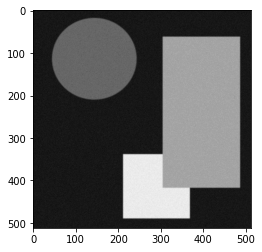

In [13]:
#generazione dei grafici
A1 = np.asarray(Image.open('Immagini_progetto/img_1.png'))/255.0
A2 = np.asarray(Image.open('Immagini_progetto/img_2.png'))/255.0

b1 = A(A1, K1) + np.random.normal(size=A1.shape)*deviation[1]
b2 = A(A2, K1) + np.random.normal(size=A2.shape)*deviation[1]


In [23]:
#ricostruzione b1

fun_ev_l = []
error_l = []
norm_grad_l = []

def callback_info1(x):
    x = np.reshape(x, (512,512))
    f = 0.5*(np.linalg.norm(A(x,K1)-b1,2)**2 + LAMBDA_TIKHONOV[1]*np.linalg.norm(x,2)**2)
    df = AT(A(x,K1), K1) - AT(b1,K1) + LAMBDA_TIKHONOV[1]*x
    n = np.linalg.norm(df)
    fun_ev_l.append(f)
    error_l.append(np.linalg.norm(A1-x))
    norm_grad_l.append(n)

x0 = np.ones(A1.shape).flatten()

#metodo del gradiente
(x_last1, norm_grad_list1, function_eval_list1, error_list1, k1) = metodo_gradiente(x0,
                                                                                   A1.flatten(),
                                                                                   f_tikhonov_gradiente,
                                                                                   grad_f_tikhonov,
                                                                                   K1,
                                                                                   b1, 
                                                                                   LAMBDA_TIKHONOV[1],
                                                                                   step,
                                                                                   MAXITERATIONS,
                                                                                   ABSOLUTE_STOP)

#metodo dei gradienti coniugati
result_minimize = np.reshape(minimize(f_tikhonov, x0, method='CG', jac=True, callback=callback_info1, args=(K1,b1,LAMBDA_TIKHONOV[1])).x, (512,512))

iterations= 40


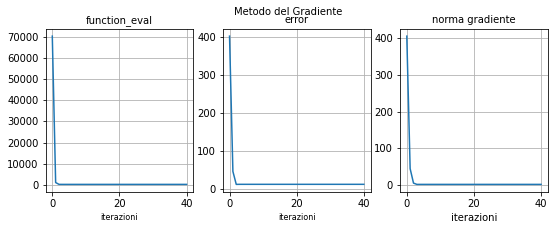

In [24]:
#plot 1
#error_list
plt.figure(figsize=(9,3))
plt.suptitle("Metodo del Gradiente", fontsize=10)
x_err = np.linspace(0,30,1)
#plt.plot(error_list[0], '-o')
ax0 = plt.subplot(1,3,1)
ax0.plot(function_eval_list1[0])
ax0.grid()
ax0.set_title('function_eval', fontsize=10)
ax0.set_xlabel('iterazioni', fontsize=8)

ax1 = plt.subplot(1,3,2)
ax1.plot(error_list1[0])
ax1.grid()
ax1.set_title('error', fontsize=10)
ax1.set_xlabel('iterazioni', fontsize=8)

ax2 = plt.subplot(1,3,3)
ax2.plot(norm_grad_list1[0])
ax2.grid()
ax2.set_title('norma gradiente', fontsize=10)
ax2.set_xlabel('iterazioni')

plt.show()

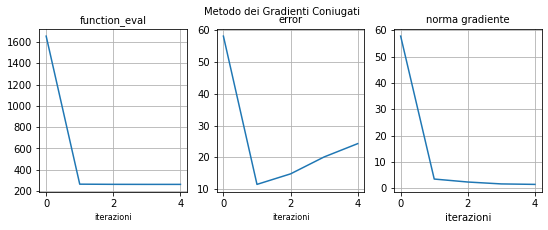

In [25]:
#plot 2
#error_list
plt.figure(figsize=(9,3))
plt.suptitle("Metodo dei Gradienti Coniugati", fontsize=10)
x_err = np.linspace(0,30,1)
#plt.plot(error_list[0], '-o')
ax0 = plt.subplot(1,3,1)
ax0.plot(fun_ev_l)
ax0.grid()
ax0.set_title('function_eval', fontsize=10)
ax0.set_xlabel('iterazioni', fontsize=8)

ax1 = plt.subplot(1,3,2)
ax1.plot(error_l)
ax1.grid()
ax1.set_title('error', fontsize=10)
ax1.set_xlabel('iterazioni', fontsize=8)

ax2 = plt.subplot(1,3,3)
ax2.plot(norm_grad_l)
ax2.grid()
ax2.set_title('norma gradiente', fontsize=10)
ax2.set_xlabel('iterazioni')

plt.show()

In [27]:
#ricostruzione b2

fun_ev_l2 = []
error_l2 = []
norm_grad_l2 = []

def callback_info2(x):
    x = np.reshape(x, (512,512))
    f = 0.5*(np.linalg.norm(A(x,K1)-b2,2)**2 + LAMBDA_TIKHONOV[1]*np.linalg.norm(x,2)**2)
    df = AT(A(x,K1), K1) - AT(b2,K1) + LAMBDA_TIKHONOV[1]*x
    n = np.linalg.norm(df)
    fun_ev_l2.append(f)
    error_l2.append(np.linalg.norm(A2-x))
    norm_grad_l2.append(n)

x0 = np.ones(A1.shape).flatten()

#metodo del gradiente
(x_last2, norm_grad_list2, function_eval_list2, error_list2, k2) = metodo_gradiente(x0,
                                                                                   A2.flatten(),
                                                                                   f_tikhonov_gradiente,
                                                                                   grad_f_tikhonov,
                                                                                   K1,
                                                                                   b2, 
                                                                                   LAMBDA_TIKHONOV[1],
                                                                                   step,
                                                                                   MAXITERATIONS,
                                                                                   ABSOLUTE_STOP)

#metodo dei gradienti coniugati
result_minimize2 = np.reshape(minimize(f_tikhonov, x0, method='CG', jac=True, callback=callback_info2, args=(K1,b2,LAMBDA_TIKHONOV[1])).x, (512,512))

iterations= 40


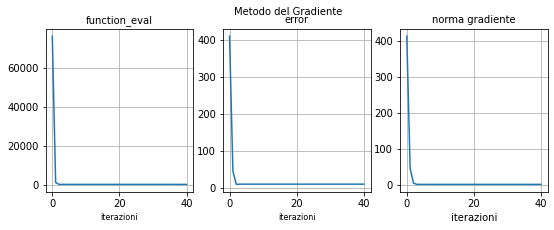

In [28]:
#plot 3
#error_list
plt.figure(figsize=(9,3))
plt.suptitle("Metodo del Gradiente", fontsize=10)
x_err = np.linspace(0,30,1)
#plt.plot(error_list[0], '-o')
ax0 = plt.subplot(1,3,1)
ax0.plot(function_eval_list2[0])
ax0.grid()
ax0.set_title('function_eval', fontsize=10)
ax0.set_xlabel('iterazioni', fontsize=8)

ax1 = plt.subplot(1,3,2)
ax1.plot(error_list2[0])
ax1.grid()
ax1.set_title('error', fontsize=10)
ax1.set_xlabel('iterazioni', fontsize=8)

ax2 = plt.subplot(1,3,3)
ax2.plot(norm_grad_list2[0])
ax2.grid()
ax2.set_title('norma gradiente', fontsize=10)
ax2.set_xlabel('iterazioni')

plt.show()

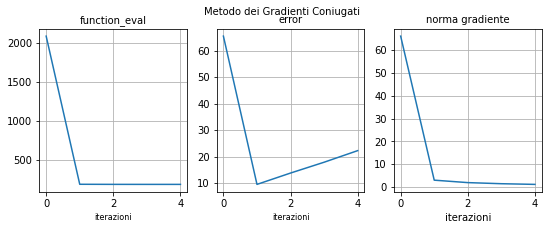

In [29]:
#plot 4
#error_list
plt.figure(figsize=(9,3))
plt.suptitle("Metodo dei Gradienti Coniugati", fontsize=10)
x_err = np.linspace(0,30,1)
#plt.plot(error_list[0], '-o')
ax0 = plt.subplot(1,3,1)
ax0.plot(fun_ev_l2)
ax0.grid()
ax0.set_title('function_eval', fontsize=10)
ax0.set_xlabel('iterazioni', fontsize=8)

ax1 = plt.subplot(1,3,2)
ax1.plot(error_l2)
ax1.grid()
ax1.set_title('error', fontsize=10)
ax1.set_xlabel('iterazioni', fontsize=8)

ax2 = plt.subplot(1,3,3)
ax2.plot(norm_grad_l2)
ax2.grid()
ax2.set_title('norma gradiente', fontsize=10)
ax2.set_xlabel('iterazioni')

plt.show()